In [1]:
# We have to do it with the legacy scipy.fftpack instead of scipy.fft because our scipy version is old.
from scipy.fftpack import fft, fftshift, ifft, ifftshift
import numpy as np
import matplotlib.pyplot as plt

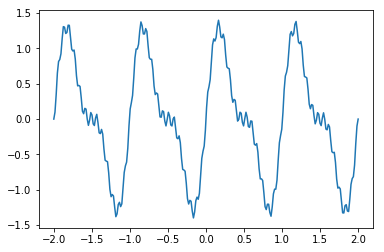

In [13]:
def f(x):
    return 1*np.sin(np.pi*2*x)+0.5*np.sin(np.pi*4*x)+0.1*np.sin(np.pi*100*x)
def df(x):
    return 1*np.cos(np.pi*2*x)+0.5*np.cos(np.pi*4*x)+0.1*np.cos(np.pi*100*x)
def g(x):
    return np.exp(-x*x)
def dg(x):
    return -x*2*np.exp(-x*x) # broadcasting.
func=f
slices=256
x=np.linspace(-2,2,slices)
y=func(x)
plt.plot(x,y)

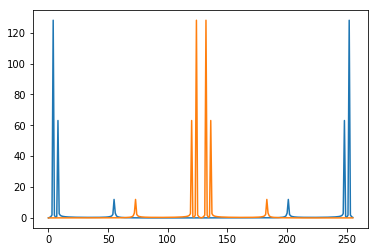

In [14]:
ky=fft(y)
# print(ky)
shifted=fftshift(ky)
plt.figure()
plt.plot(np.abs(ky))
plt.plot(np.abs(shifted))

(118.0, 138.0)

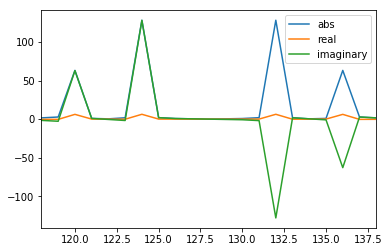

In [15]:
plt.figure()
plt.plot(np.abs(shifted))
plt.plot(np.real(shifted))
plt.plot(np.imag(shifted))
plt.legend(["abs","real","imaginary"])
fRange=10
plt.xlim([slices/2-fRange,slices/2+fRange])

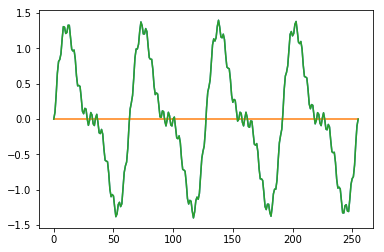

In [16]:
# correct way of inverse transforming ky.
inversed=ifft(ky)
plt.figure()
plt.plot(np.real(inversed))
plt.plot(np.imag(inversed))
plt.plot(y)

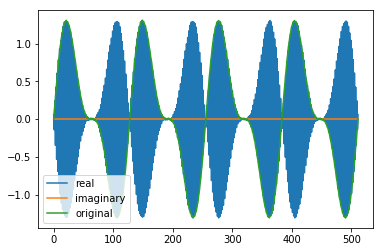

In [6]:
shiftedInversed=ifftshift(ifft(shifted))
plt.figure()
plt.plot(np.real(shiftedInversed))
plt.plot(np.imag(shiftedInversed))
plt.plot(y)
plt.legend(["real","imaginary","original"])
# What the f**k is this...

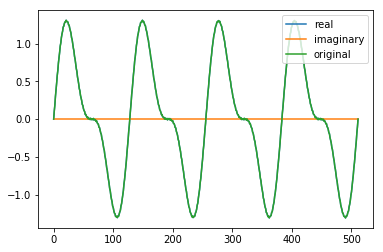

In [7]:
# another way of correct inverse fft... Looks pretty obvious.
shiftedInversed=ifft(fftshift(shifted))
plt.figure()
plt.plot(np.real(shiftedInversed))
plt.plot(np.imag(shiftedInversed))
plt.plot(y)
plt.legend(["real","imaginary","original"])

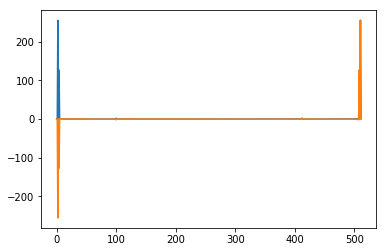

In [8]:
# Now that the 0-low bound summation can be viewed as even prolongation anyway, 
# Let's calculate the positive half.
x=np.linspace(0,2,slices)
y=func(x)
ky=fft(y)
plt.figure()
plt.plot(np.abs(ky) )
plt.plot(np.imag(ky))

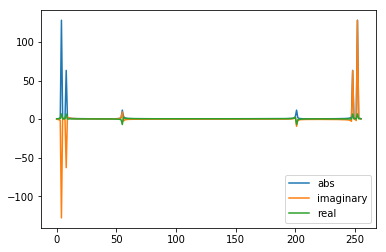

In [18]:
# How to get rid of the surge in imagery parts?
y[0]=g(0)/2
ky=fft(y)
plt.figure()
plt.plot(np.abs(ky) ,label="abs")
plt.plot(np.imag(ky),label="imaginary")
plt.plot(np.real(ky),label="real")
plt.legend()
# Turns out the imaginary part ALWAYS exists. Shall we discard all of it?